In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import math
import copy
import pandas as pd
#%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
from scipy import stats
#!pip install seaborn
import seaborn as sns

In [2]:
#BodyBrain_stats = pd.read_csv('/media/leguiart/Volume2/MSc_Thesis/experiments/BodyBrainNSLC_stats.csv')
#BodyBrain_raw = pd.read_csv('/media/leguiart/Volume2/MSc_Thesis/experiments/BodyBrainNSLC.csv')
BodyBrain_stats = pd.read_csv('/media/leguiart/LuisExtra/ExperimentsData2/NSLC_experiments/BodyBrainNSLC_stats.csv')
BodyBrain_raw = pd.read_csv('/media/leguiart/LuisExtra/ExperimentsData2/NSLC_experiments/BodyBrainNSLC.csv')

In [3]:
grouped_by_run = [BodyBrain_raw[BodyBrain_raw['run'] == i] for i in range(1, 21)]
grouped_by_run = [run_df for run_df in grouped_by_run if len(run_df) == 90000]

In [21]:
run2 = grouped_by_run[0].copy()
run2

,id,generation,run,md5,fitness,unaligned_novelty,aligned_novelty,gene_diversity,control_gene_div,morpho_gene_div,...,morphology_passive,control_cppn_nodes,control_cppn_edges,control_cppn_ws,morpho_cppn_nodes,morpho_cppn_edges,morpho_cppn_ws,simplified_gene_div,simplified_gene_ne_div,simplified_gene_nws_div
0,25,1,1,149a54b364a28c771865d158dc8c3aea,0.193437,20.757527,0.161226,6.117554,5.298087,2.963625,...,19,12,20,-2.191741,11,17,-0.770216,6.196737,5.221876,3.068360
1,3,1,1,0f8f93c1e0f662251a5e0e3ecf1c6e61,0.005093,26.479305,0.004483,6.445133,5.645238,2.986725,...,84,12,20,5.512849,11,18,-2.576711,6.660890,5.888045,2.792057
2,10,1,1,f3b7d050fca6bdb7909af7ccc0926428,0.521971,15.078667,0.466893,5.933724,4.757382,3.431177,...,2,12,20,1.631693,11,18,1.355500,4.612394,3.449172,2.792057
3,9,1,1,31bd967736ec647f52c1d94ef2dda0b7,0.030704,16.989246,0.017578,6.120415,5.024653,3.380394,...,26,11,19,-0.609046,10,16,4.122075,6.410659,5.341049,3.500215
4,13,1,1,5ce4b905226b3f005e304e2d6e1cd8b8,0.078720,13.364343,0.055467,6.476697,5.674249,3.004477,...,3,11,18,2.282752,12,20,1.107541,5.007793,3.577225,3.413529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,89816,3000,1,87d1b7548b8fa96cb65e1f95ada6178f,7.118723,4.073935,3.774900,2.699810,1.806293,1.919863,...,9,9,11,3.021735,8,16,1.847396,7.125512,4.647393,6.447166
89996,89932,3000,1,87d1b7548b8fa96cb65e1f95ada6178f,7.118723,4.073935,3.774900,2.675611,1.758796,1.919863,...,9,9,11,2.496704,8,16,1.847396,7.174324,4.740353,6.447166
89997,89962,3000,1,87d1b7548b8fa96cb65e1f95ada6178f,7.118723,4.073935,3.774900,2.668585,1.742331,1.919863,...,9,9,10,1.496704,8,16,1.847396,7.776668,5.092502,6.880249
89998,89911,3000,1,282898e93c62271a30852fa49fe72782,0.058529,5.059644,0.053142,3.150065,2.243568,2.149303,...,5,8,10,1.340258,13,22,5.830654,6.796831,4.339424,5.904031


In [5]:
for run_df in grouped_by_run:
    print(len(run_df))

90000


In [6]:
run2.drop(['md5', 'id'], inplace=True, axis=1)

In [7]:
run2.head(5)

,generation,run,fitness,unaligned_novelty,aligned_novelty,gene_diversity,control_gene_div,morpho_gene_div,morpho_div,endpoint_div,...,morphology_passive,control_cppn_nodes,control_cppn_edges,control_cppn_ws,morpho_cppn_nodes,morpho_cppn_edges,morpho_cppn_ws,simplified_gene_div,simplified_gene_ne_div,simplified_gene_nws_div
0,1,1,0.193437,20.757527,0.161226,6.117554,5.298087,2.963625,47.619477,0.208830,...,19,12,20,-2.191741,11,17,-0.770216,6.196737,5.221876,3.068360
1,1,1,0.005093,26.479305,0.004483,6.445133,5.645238,2.986725,50.889076,0.045461,...,84,12,20,5.512849,11,18,-2.576711,6.660890,5.888045,2.792057
2,1,1,0.521971,15.078667,0.466893,5.933724,4.757382,3.431177,44.402049,0.510144,...,2,12,20,1.631693,11,18,1.355500,4.612394,3.449172,2.792057
3,1,1,0.030704,16.989246,0.017578,6.120415,5.024653,3.380394,40.917401,0.050327,...,26,11,19,-0.609046,10,16,4.122075,6.410659,5.341049,3.500215
4,1,1,0.078720,13.364343,0.055467,6.476697,5.674249,3.004477,38.784130,0.109955,...,3,11,18,2.282752,12,20,1.107541,5.007793,3.577225,3.413529


/home/leguiart/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


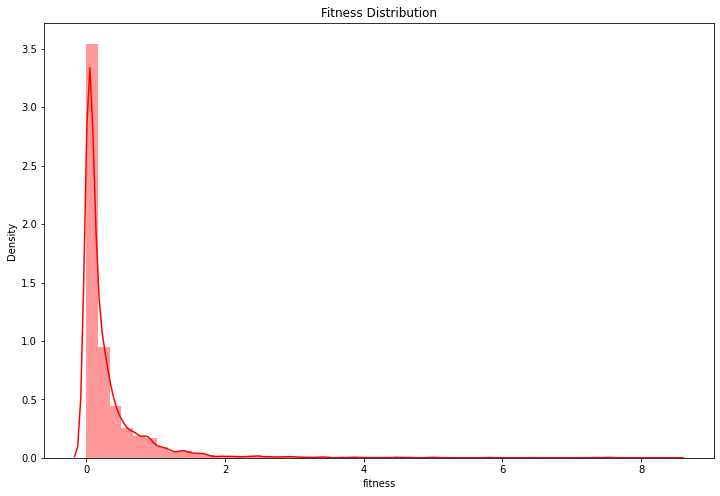

In [8]:
plt.figure(figsize=(12, 8))

sns.distplot(run2['fitness'], 
             color='red')

plt.title('Fitness Distribution')

plt.show()

<Figure size 864x576 with 0 Axes>

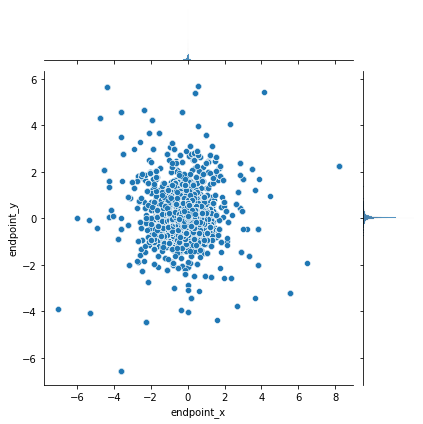

In [9]:
plt.figure(figsize=(12, 8))
sns.jointplot(x='endpoint_x', y='endpoint_y', 
              data=run2)

plt.show()

<Figure size 864x576 with 0 Axes>

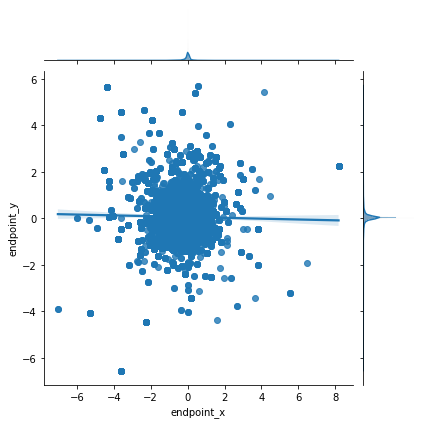

In [10]:
plt.figure(figsize=(12, 8))
sns.jointplot(x='endpoint_x', y='endpoint_y', 
              data=run2, kind='reg')

plt.show()

<Figure size 864x576 with 0 Axes>

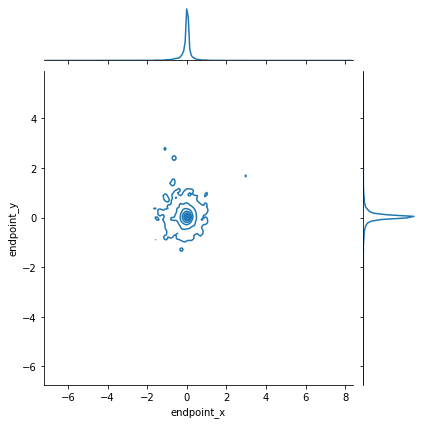

In [11]:
plt.figure(figsize=(12, 8))
sns.jointplot(x='endpoint_x', y='endpoint_y', 
              data=run2, kind='kde')
plt.show()

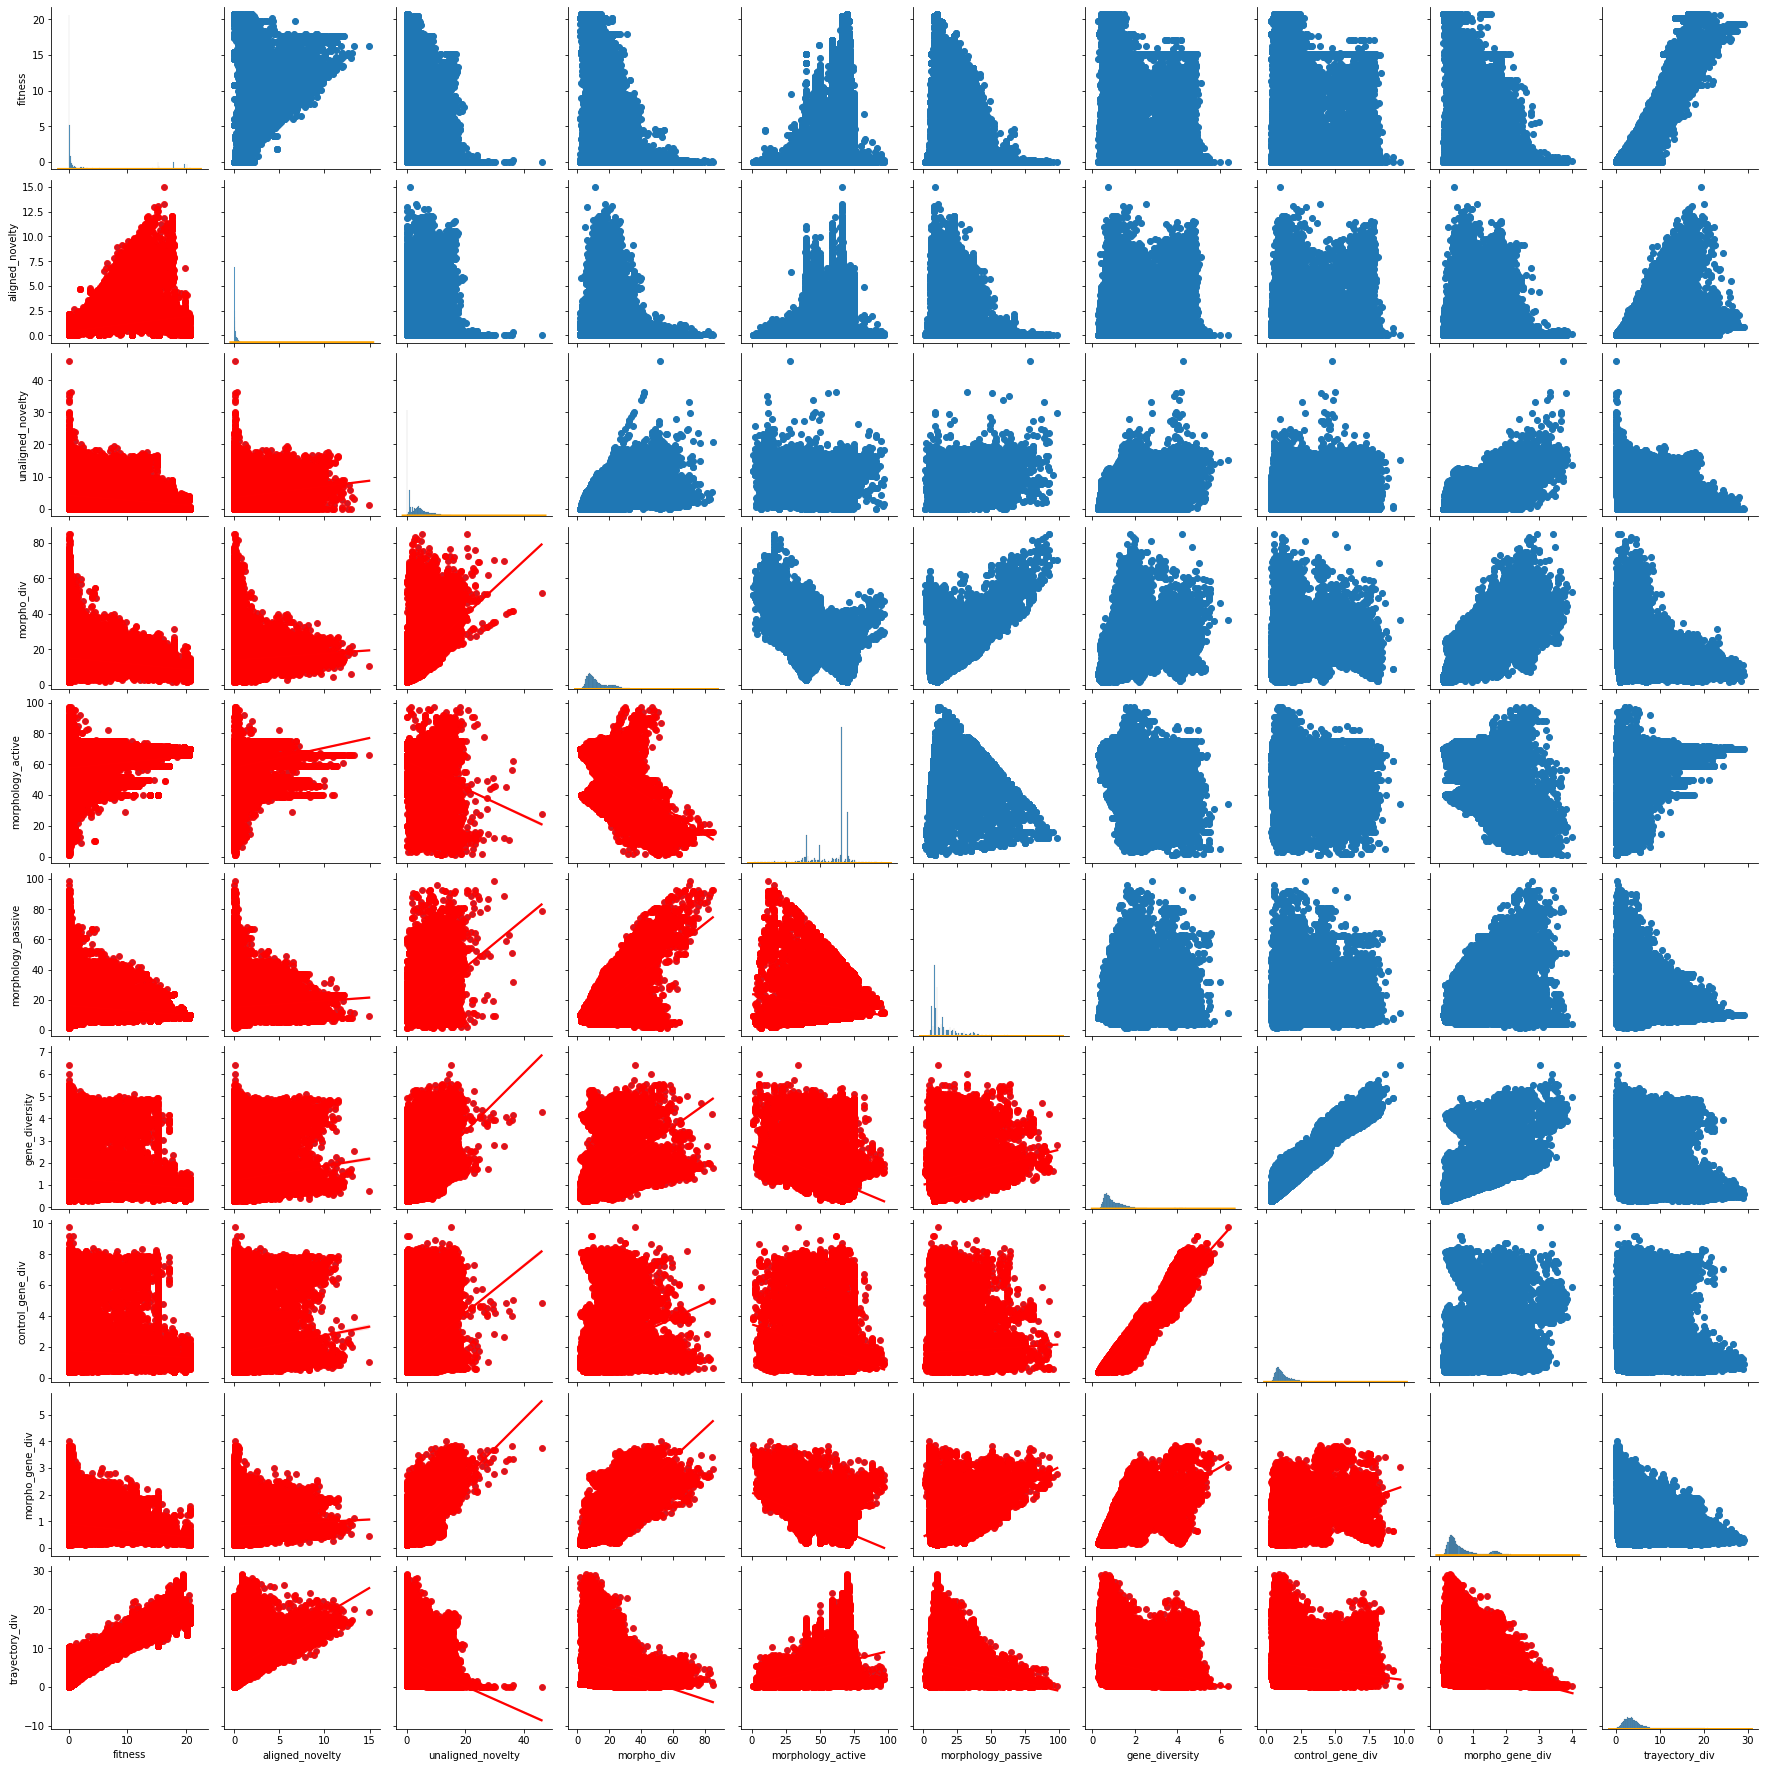

In [22]:
g = sns.pairplot(run2,
        vars=["fitness", "aligned_novelty", "unaligned_novelty", "morpho_div", "morphology_active", "morphology_passive", "gene_diversity", "control_gene_div", "morpho_gene_div", "trayectory_div"])
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3, legend=False, color='orange')
g.map_lower(sns.regplot, color='red')
plt.show()

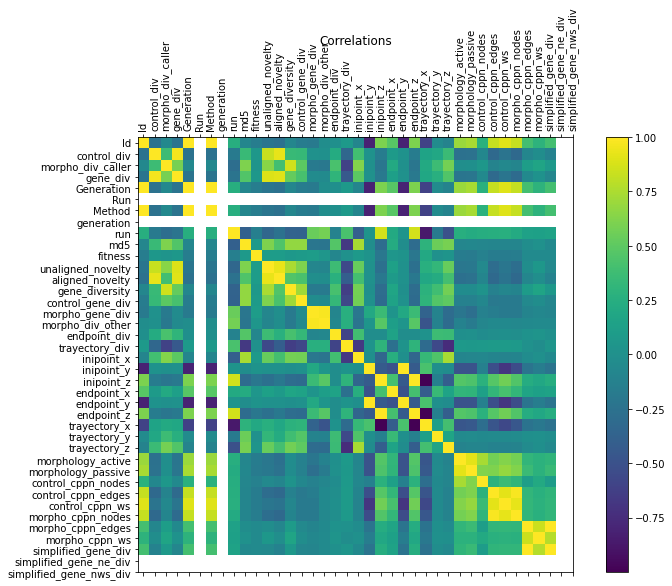

In [29]:
plt.figure(figsize=(12, 8))

plt.matshow(run2.corr(), 
            fignum=False, 
            aspect='equal')

columns = len(run2.columns)

plt.xticks(range(columns), run2.columns)
plt.yticks(range(columns), run2.columns)

plt.colorbar()
plt.xticks(rotation=90)
plt.title('Correlations', y=1.2)

plt.show()

In [22]:
run2[["fitness", "aligned_novelty", "unaligned_novelty", "morpho_div", "morphology_active", "morphology_passive", "gene_diversity", "control_gene_div", "morpho_gene_div", "trayectory_div"]].corr()

,fitness,aligned_novelty,unaligned_novelty,morpho_div,morphology_active,morphology_passive,gene_diversity,control_gene_div,morpho_gene_div,trayectory_div
fitness,1.000000,0.916088,0.074637,-0.057685,0.204115,-0.198586,0.018908,0.015102,-0.019030,0.920946
aligned_novelty,0.916088,1.000000,0.090609,-0.032264,0.151815,-0.167681,0.041033,0.034061,0.008388,0.872134
unaligned_novelty,0.074637,0.090609,1.000000,0.280769,0.031610,-0.000204,0.275234,0.251189,0.163765,0.159537
morpho_div,-0.057685,-0.032264,0.280769,1.000000,-0.113570,0.189022,0.197980,0.145908,0.221845,-0.004968
morphology_active,0.204115,0.151815,0.031610,-0.113570,1.000000,-0.386302,-0.061059,-0.020457,-0.140777,0.152504
morphology_passive,-0.198586,-0.167681,-0.000204,0.189022,-0.386302,1.000000,-0.058884,-0.034946,-0.079868,-0.172162
gene_diversity,0.018908,0.041033,0.275234,0.197980,-0.061059,-0.058884,1.000000,0.948643,0.528802,0.055553
control_gene_div,0.015102,0.034061,0.251189,0.145908,-0.020457,-0.034946,0.948643,1.000000,0.253306,0.044278
morpho_gene_div,-0.019030,0.008388,0.163765,0.221845,-0.140777,-0.079868,0.528802,0.253306,1.000000,0.002058
trayectory_div,0.920946,0.872134,0.159537,-0.004968,0.152504,-0.172162,0.055553,0.044278,0.002058,1.000000


In [23]:
d = {'Mean':[], 'Median':[], 'Max':[], 'Generation':[], 'Run':[]}
for j, run_i in enumerate(grouped_by_run):
    for i in range(1, 3001):
        gen_i = run_i[run_i['generation'] == i]
        fitness = gen_i['fitness'].to_numpy()
        d['Mean'] += [fitness.mean()]
        d['Median'] += [np.median(fitness)]
        d['Max'] += [fitness.max()]
        d['Generation'] += [i]
        d['Run'] += [j + 1]

In [24]:
computed_stats = pd.DataFrame(d)

In [25]:
fitness_stats = computed_stats

In [17]:
#fitness_stats = BodyBrain_stats[BodyBrain_stats['Indicator'] == 'fitness']
fitness_stats.head(10)

,Mean,Median,Max,Generation,Run
0,0.040959,0.010579,0.521971,1,1
1,0.058480,0.030487,0.521971,2,1
2,0.075823,0.034642,0.521971,3,1
3,0.087727,0.054860,0.521971,4,1
4,0.102532,0.068650,0.521971,5,1
5,0.097866,0.066717,0.521971,6,1
6,0.135650,0.069863,0.616322,7,1
7,0.151489,0.106023,0.619945,8,1
8,0.192775,0.127157,0.619945,9,1
9,0.167938,0.126939,0.619945,10,1


/home/leguiart/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/leguiart/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


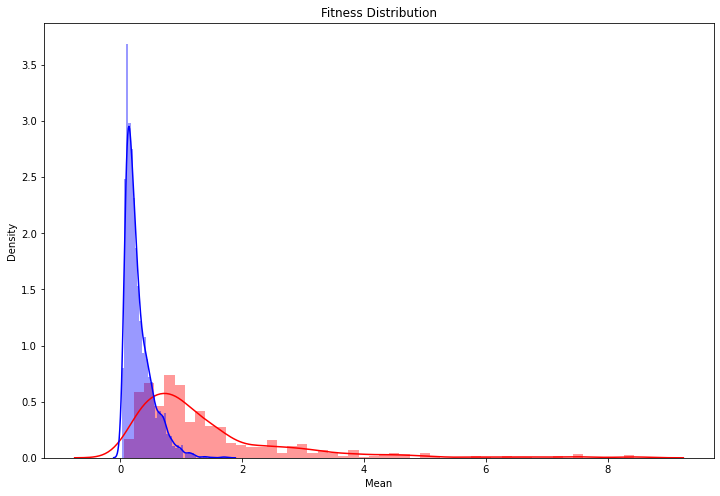

In [26]:
run2 = fitness_stats[fitness_stats['Run'] == 1]

plt.figure(figsize=(12, 8))

sns.distplot(run2['Max'], 
             color='red')

sns.distplot(run2['Mean'], 
             color='blue')

plt.title('Fitness Distribution')

plt.show()

Text(0.5, 1.0, 'Generation')

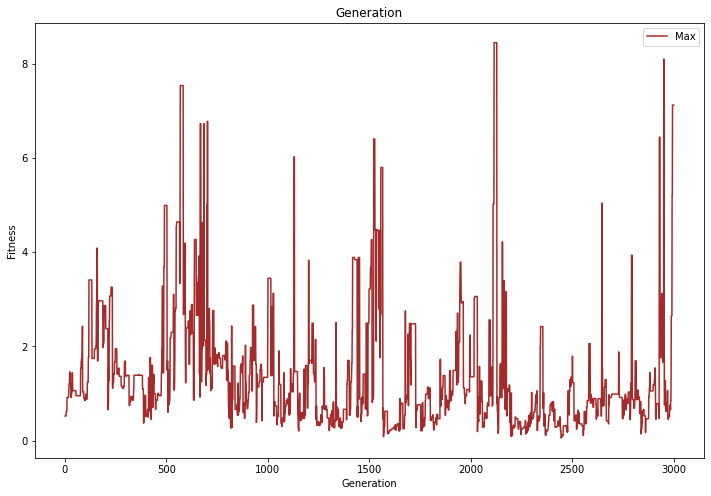

In [28]:
run2.plot(x='Generation', y='Max', 
                    figsize=(12, 8), color='brown')

plt.ylabel('Fitness')
plt.title('Generation')

In [81]:


def tsplot(ax, data,**kw):
    x = np.arange(data.shape[1])
    est = np.median(data, axis=0)
    sd = np.std(data, axis=0)
    cis = (est - sd, est + sd)
    ax.fill_between(x,cis[0],cis[1],alpha=0.2, **kw)
    ax.plot(x,est,**kw)
    ax.margins(x=0)



In [105]:
fitness_max_mat = []
fitness_median_mat = []
fitness_mean_mat = []
for i in range(len(grouped_by_run)):
    run_i = fitness_stats[fitness_stats['Run'] == i + 1]
    fitness_max_mat += [run_i['Max'].tolist()]
    fitness_median_mat += [run_i['Median'].tolist()]
    fitness_mean_mat += [run_i['Mean'].tolist()]
    


In [106]:
fitness_max_mat = np.array(fitness_max_mat)
fitness_median_mat = np.array(fitness_median_mat)
fitness_mean_mat = np.array(fitness_mean_mat)

In [107]:
fitness_max_mat.shape

(5, 3000)

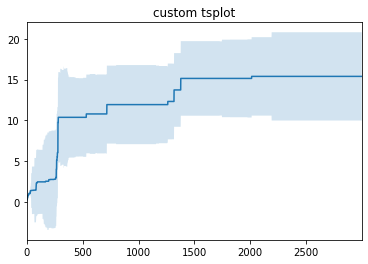

In [108]:
fig, (ax2) = plt.subplots(ncols=1, sharey=True)

tsplot(ax2, fitness_max_mat)

ax2.set_title("custom tsplot")

plt.show()

In [112]:



def bootstrap(data, n_boot=10000, ci=68):
    boot_dist = []
    for i in range(int(n_boot)):
        resampler = np.random.randint(0, data.shape[0], data.shape[0])
        sample = data.take(resampler, axis=0)
        boot_dist.append(np.mean(sample, axis=0))
    b = np.array(boot_dist)
    s1 = np.apply_along_axis(stats.scoreatpercentile, 0, b, 50.-ci/2.)
    s2 = np.apply_along_axis(stats.scoreatpercentile, 0, b, 50.+ci/2.)
    return (s1,s2)
    
def tsplotboot(ax, data,ci = 68, **kw):
    x = np.arange(data.shape[1])
    est = np.mean(data, axis=0)
    cis = bootstrap(data, ci = ci)
    ax.fill_between(x,cis[0],cis[1],alpha=0.2, **kw)
    ax.plot(x,est,**kw)
    ax.margins(x=0)

Text(0.5, 1.0, 'custom tsplot bootstrapped')

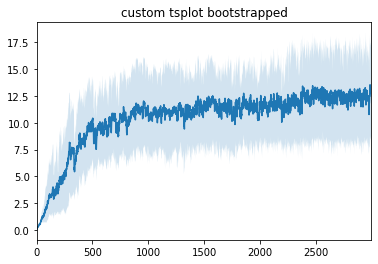

In [114]:
fig, (ax2) = plt.subplots(ncols=1, sharey=True)

#tsplot(ax, fitness_max_mat)
tsplotboot(ax2, fitness_mean_mat[:, :3000], ci=95)
#ax.set_title("custom tsplot")
ax2.set_title("custom tsplot bootstrapped")

In [3]:
pareto_plot = np.array([[-1.81857872e-01, -5.44203700e+01],
       [-1.09865479e-01, -3.76353661e+01],
       [-6.86816755e-02, -4.32262828e+01],
       [-7.56706319e-02, -3.83155649e+01],
       [-2.40783407e-03, -4.97955685e+01],
       [-9.42919415e-02, -2.88027141e+01],
       [-8.75455504e-02, -3.02819983e+01],
       [-5.04116758e-02, -3.31386835e+01],
       [-7.84176045e-03, -3.28258762e+01],
       [-4.35436653e-02, -2.97728957e+01],
       [-1.56684493e-01, -3.33987600e+01],
       [-4.41154936e-02, -5.87815413e+01],
       [-1.26900164e-01, -5.24887079e+01],
       [-8.75455504e-02, -3.02819983e+01],
       [-8.14415198e-03, -3.35656170e+01],
       [-1.11555243e-01, -3.93111248e+01],
       [-5.04116758e-02, -3.31386835e+01],
       [-7.73227366e-02, -4.20198469e+01],
       [-1.86508003e-01, -6.88610416e+01],
       [-1.05595129e-01, -6.59654790e+01]])

In [5]:
ids = np.array([3, 0, 1, 4, 6, 2, 9, 7, 5, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], np.int64)
[3, 0, 1, 4, 6, 9, 7, 2, 5, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [6]:
pareto_plot = np.column_stack((ids, pareto_plot))

In [7]:
pareto_plot = pd.DataFrame(pareto_plot, columns = ['id', 'fitness', 'novelty'])

In [8]:
pareto_plot

,id,fitness,novelty
0,3.0,-0.181858,-54.420370
1,0.0,-0.109865,-37.635366
2,1.0,-0.068682,-43.226283
3,4.0,-0.075671,-38.315565
4,6.0,-0.002408,-49.795569
5,2.0,-0.094292,-28.802714
6,9.0,-0.087546,-30.281998
7,7.0,-0.050412,-33.138683
8,5.0,-0.007842,-32.825876
9,8.0,-0.043544,-29.772896


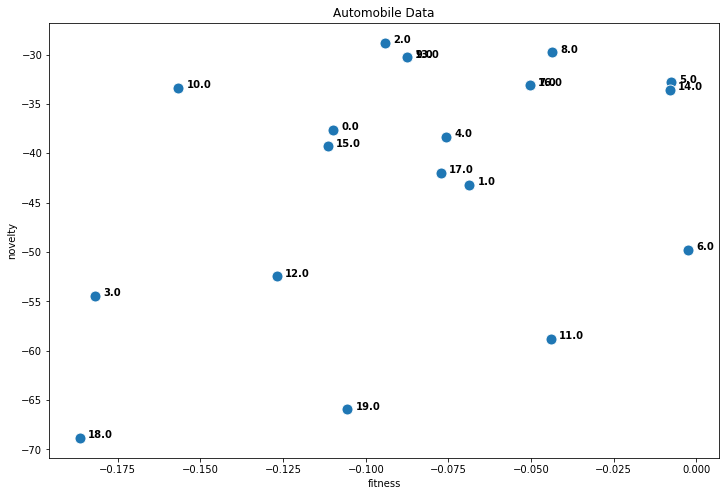

In [9]:
plt.figure(figsize=(12, 8))

p1 = sns.scatterplot(x='fitness', y='novelty', 
                data=pareto_plot, s=120)

for line in range(0,pareto_plot.shape[0]):
     p1.text(pareto_plot.fitness[line]+0.0025, pareto_plot.novelty[line], 
     pareto_plot.id[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

plt.title('Automobile Data')

plt.show()

In [12]:
survivors = pareto_plot.iloc[[18, 0, 19, 10, 12, 11, 2, 15, 17, 4], :]
survivors

,id,fitness,novelty
18,18.0,-0.186508,-68.861042
0,3.0,-0.181858,-54.420370
19,19.0,-0.105595,-65.965479
10,10.0,-0.156684,-33.398760
12,12.0,-0.126900,-52.488708
11,11.0,-0.044115,-58.781541
2,1.0,-0.068682,-43.226283
15,15.0,-0.111555,-39.311125
17,17.0,-0.077323,-42.019847
4,6.0,-0.002408,-49.795569


In [13]:
tournament_indexes = np.array([[6, 5],
       [0, 4],
       [9, 3],
       [8, 2],
       [1, 7],
       [3, 6],
       [7, 5],
       [2, 8],
       [9, 4],
       [1, 0]])

In [16]:
tournament_winners = np.array([5., 0., 9., 2., 1., 3., 5., 2., 4., 0.])

In [17]:
survivors.iloc[tournament_winners, :]

,id,fitness,novelty
11,11.0,-0.044115,-58.781541
18,18.0,-0.186508,-68.861042
4,6.0,-0.002408,-49.795569
19,19.0,-0.105595,-65.965479
0,3.0,-0.181858,-54.420370
10,10.0,-0.156684,-33.398760
11,11.0,-0.044115,-58.781541
19,19.0,-0.105595,-65.965479
12,12.0,-0.126900,-52.488708
18,18.0,-0.186508,-68.861042


In [ ]:
[array([ -0.19000361, -46.33960885]), 
 array([ -0.08229078, -53.23336948]), 
 array([ -0.18730336, -42.0751516 ]), 
 array([ -0.18300995, -46.33960885]), 
 array([-1.29223909e-02, -5.18158565e+01]), 
 array([ -0.17188319, -46.33960885]), 
 array([-2.18590892e-03, -5.05051646e+01]), 
 array([-2.18590892e-03, -5.05051646e+01]), 
 array([ -0.08006517, -42.58700747]), 
 array([ -0.1624015 , -38.02066754]), 
 array([ -0.14479606, -49.13475351]), 
 array([ -0.18099036, -47.61097185]), 
 array([ -0.16056119, -49.13475351]), 
 array([-1.46980045e-03, -5.80607919e+01]), 
 array([ -0.06838493, -67.38136963]), 
 array([ -0.07364034, -51.48698217]), 
 array([ -0.08006517, -42.58700747]), 
 array([ -0.13552332, -43.60922584]), 
 array([ -0.14049073, -49.13475351]), 
 array([ -0.07647704, -53.51893148])]

In [1]:
[[0.1745799536087905, 54.42037004045381, 0.1290030682916371], [0.10609326883729446, 37.63536606148458, 0.20074988593763374], [0.0796577620325119, 43.226282773327924, 0.11434455465100764], [0.001886117759640692, 49.79556848063127, 0.09085349299056196], [0.09626681129774153, 30.281998259256277, 0.07137179747072088], [0.07436383382880075, 38.315564943463116, 0.0957906055212885], [0.07972661529975145, 28.802714126970297, 0.07188431771291624], [0.054134798284911544, 33.13868351127313, 0.07824960991358688], [0.008206027818623974, 32.82587619434412, 0.07151423339485782], [0.04366107984291968, 29.772895736051876, 0.11138574329816604]]

[[0.1745799536087905, 54.42037004045381, 0.1290030682916371],
 [0.10609326883729446, 37.63536606148458, 0.20074988593763374],
 [0.0796577620325119, 43.226282773327924, 0.11434455465100764],
 [0.001886117759640692, 49.79556848063127, 0.09085349299056196],
 [0.09626681129774153, 30.281998259256277, 0.07137179747072088],
 [0.07436383382880075, 38.315564943463116, 0.0957906055212885],
 [0.07972661529975145, 28.802714126970297, 0.07188431771291624],
 [0.054134798284911544, 33.13868351127313, 0.07824960991358688],
 [0.008206027818623974, 32.82587619434412, 0.07151423339485782],
 [0.04366107984291968, 29.772895736051876, 0.11138574329816604]]

In [2]:
[[0.1745799536087905, 38.422598964092586, 0.1015109247879249], [0.10609326883729446, 27.44048759983132, 0.16508518277566595], [0.0796577620325119, 30.3297765312161, 0.09300718489977867], [0.001886117759640692, 38.53554647545725, 0.07216547467624573], [0.09626681129774153, 19.425894753866817, 0.057052528022613694], [0.07436383382880075, 27.316762654613107, 0.08337605965697106], [0.07972661529975145, 19.71638870642372, 0.058746200822718794], [0.054134798284911544, 23.313816981475405, 0.06619935706110809], [0.008206027818623974, 21.119866034703364, 0.0571601274708769], [0.04366107984291968, 20.20609320634022, 0.09237024592997171]]

[[0.1745799536087905, 38.422598964092586, 0.1015109247879249],
 [0.10609326883729446, 27.44048759983132, 0.16508518277566595],
 [0.0796577620325119, 30.3297765312161, 0.09300718489977867],
 [0.001886117759640692, 38.53554647545725, 0.07216547467624573],
 [0.09626681129774153, 19.425894753866817, 0.057052528022613694],
 [0.07436383382880075, 27.316762654613107, 0.08337605965697106],
 [0.07972661529975145, 19.71638870642372, 0.058746200822718794],
 [0.054134798284911544, 23.313816981475405, 0.06619935706110809],
 [0.008206027818623974, 21.119866034703364, 0.0571601274708769],
 [0.04366107984291968, 20.20609320634022, 0.09237024592997171]]

In [3]:
[[0.18106390712030845, 38.422598964092586, 0.11167156463953791], [0.06557151817724394, 19.425894753866817, 0.06380974949081243], [0.12760615365963185, 21.588165482134986, 0.0822409969652915], [0.05415832740129964, 20.20609320634022, 0.09870898402233927], [0.007357861276525066, 21.119866034703364, 0.05711189068701966], [0.1112125401388089, 29.557427996172596, 0.1704897453225194], [0.09665016161184178, 19.71638870642372, 0.056966782203714636], [0.08210770100005006, 30.3297765312161, 0.0949991653904494], [0.044335347456731504, 22.167387244957084, 0.09252863727439026], [0.07436383382880075, 27.316762654613107, 0.08337605965697106]]

[[0.18106390712030845, 38.422598964092586, 0.11167156463953791],
 [0.06557151817724394, 19.425894753866817, 0.06380974949081243],
 [0.12760615365963185, 21.588165482134986, 0.0822409969652915],
 [0.05415832740129964, 20.20609320634022, 0.09870898402233927],
 [0.007357861276525066, 21.119866034703364, 0.05711189068701966],
 [0.1112125401388089, 29.557427996172596, 0.1704897453225194],
 [0.09665016161184178, 19.71638870642372, 0.056966782203714636],
 [0.08210770100005006, 30.3297765312161, 0.0949991653904494],
 [0.044335347456731504, 22.167387244957084, 0.09252863727439026],
 [0.07436383382880075, 27.316762654613107, 0.08337605965697106]]